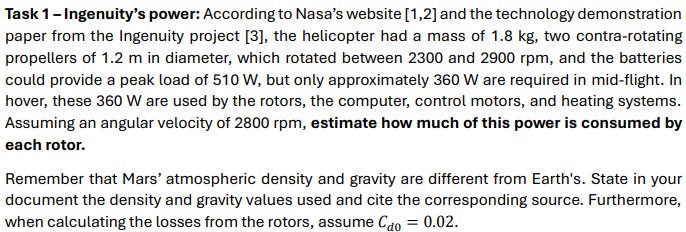

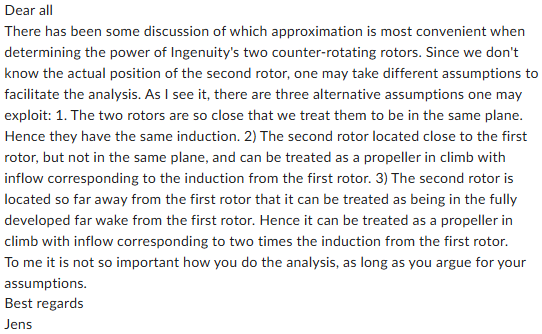

In [182]:
from sympy import*
init_printing()

T1, T2, v1, v2 = symbols('T1 T2 v1 v2')
rho_mars = 0.017        # kg/m^3
g_mars = 3.71           # m/s^2
m = 1.8                 # kg
R_rotor = 0.6           # m
A = pi*R_rotor**2       # m^2
c = 0.14                # Assumed from pictures and approves by Jens
gamma = 1.15            # Assumed
omega = 2800 *2*pi/60   # rad/s
C_d0 = 0.02             # From hand in description
N_blades = 2            # From pictures

# Derived in assignment:
lign1 = Eq(T1 * v1 , T2 * (v1 + v2))
lign2 = Eq(T1 , 2*A*rho_mars*v1**2)
lign3 = Eq(T2 , 2*A*rho_mars*v2*(v1+v2))
lign4 = Eq(T1 + T2 , m*g_mars)

start_guess = (30, 30, 10, 10)
solution = nsolve((lign1, lign2, lign3, lign4), (T1, T2, v1, v2), start_guess)
T1 = solution[0]
T2 = solution[1]
v1 = solution[2]
v2 = solution[3]
print("T1=", T1, "T2=", T2, "v1=", v1, "v2=", v2)

#Calculates P2_ideal:
P2_ideal = T2*(v2 + v1)
print("P2_ideal=", P2_ideal.evalf())

#Calculates P1_ideal:
P1_ideal = T1*v1
print("P1_ideal=", P1_ideal.evalf())

#Calculates the looses per rotor defined as P0:
P0_rotor = Rational(1,8) * rho_mars * c * N_blades * C_d0 * omega**3 * R_rotor**4
print("P0_rotor=", P0_rotor.evalf())

#Calculates the total power:
P = gamma*P1_ideal + gamma*P2_ideal + 2*P0_rotor
print("P=", P.evalf())


T1= 3.96949987083651 T2= 2.70850012916349 v1= 10.1601998562367 v2= 4.73029676318227
P2_ideal= 40.3309120170047
P1_ideal= 40.3309120170047
P0_rotor= 38.8787157583810
P= 170.518529155873


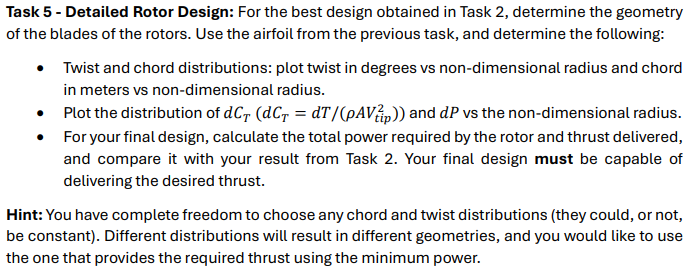

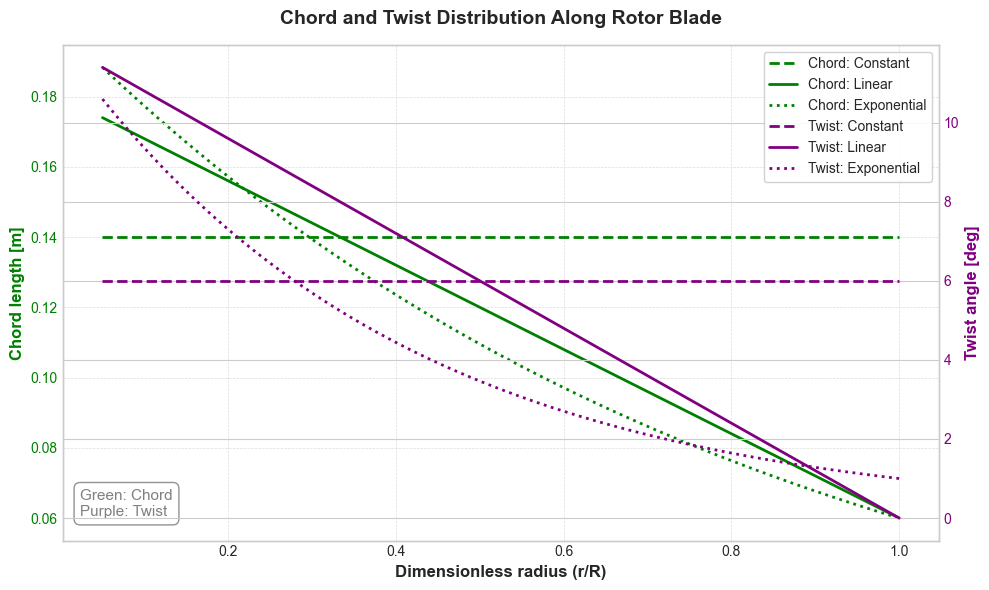

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import*

R = 1.22

# Dimensionless radius of the wing of the rotor:
r_root = 0.05 * R  # Plot start from 5% of the rotor radius
r = np.linspace(r_root, R, 100)  # Makes 100 evaluation points from the root to the tip of the wing of the rotor
dimensionless_R = r / R # Makes the 100 points dimensionless

# No twist:
alpha_constant = 6 + 0*dimensionless_R

# Decreasing linear twist with defined twist at root and tip
alpha_root_linear = 12
alpha_tip_linear = 0
alpha_linear = alpha_root_linear - dimensionless_R * (alpha_root_linear - alpha_tip_linear)

# Exponential decreasing twist with defined twist at root and tip
# Using the equation form: f(x) = start_val * e^(-k*x)
# Ensuring that: f(1)=alpha_tip_exp
alpha_root_exp = 12
alpha_tip_exp = 1
k = symbols('k')
x = 1
EQ = Eq(alpha_tip_exp , alpha_root_exp*exp(-k*x))
k_val = solve({EQ},{k})[0][k]
alpha_exponential = alpha_root_exp*np.exp(-float(k_val)*dimensionless_R)

# Constant chord: 
c_constant = 0.14 + 0*dimensionless_R

# Decreasing linear chord lenght with defined lenght at root and tip
c_root_linear = 0.18
c_tip_linear = 0.06
c_linear = c_root_linear - dimensionless_R * (c_root_linear - c_tip_linear)

# Exponential decreasing chord lengt with defined lenght at root and tip
# Using the equation form: f(x) = start_val * e^(-k*x)
# Ensuring that: f(1)=c_tip_exp
k = symbols('k')
x = 1
c_root_exp = 0.20
c_tip_exp = 0.06
EQ = Eq(c_tip_exp , c_root_exp*exp(-k*x))
k_val = solve({EQ},{k})[0][k]
c_exponential = c_root_exp*np.exp(-float(k_val)*dimensionless_R)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Chord (green)
ax1.set_xlabel("Dimensionless radius (r/R)", fontsize=12, fontweight='bold')
ax1.set_ylabel("Chord length [m]", color='green', fontsize=12, fontweight='bold')
line1 = ax1.plot(dimensionless_R, c_constant, color='green', linestyle='--', linewidth=2, label='Chord: Constant')[0]
line2 = ax1.plot(dimensionless_R, c_linear, color='green', linestyle='-', linewidth=2, markersize=5, markevery=10, label='Chord: Linear')[0]
line3 = ax1.plot(dimensionless_R, c_exponential, color='green', linestyle=':', linewidth=2, label='Chord: Exponential')[0]
ax1.tick_params(axis='y', labelcolor='green', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

# Twist (purple)
ax2 = ax1.twinx()
ax2.set_ylabel("Twist angle [deg]", color='purple', fontsize=12, fontweight='bold')
line4 = ax2.plot(dimensionless_R, alpha_constant, color='purple', linestyle='--', linewidth=2, label='Twist: Constant')[0]
line5 = ax2.plot(dimensionless_R, alpha_linear, color='purple', linestyle='-', linewidth=2, label='Twist: Linear')[0]
line6 = ax2.plot(dimensionless_R, alpha_exponential, color='purple', linestyle=':', linewidth=2, label='Twist: Exponential')[0]
ax2.tick_params(axis='y', labelcolor='purple', labelsize=10)

lines = [line1, line2, line3, line4, line5, line6]
labels = [line.get_label() for line in lines]
legend = plt.legend(lines, labels, loc='upper right', fontsize=10, frameon=True,  fancybox=True)
legend.get_frame().set_alpha(0.9)

plt.title("Chord and Twist Distribution Along Rotor Blade", fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax1.annotate("Green: Chord\nPurple: Twist", xy=(0.02, 0.05), xycoords='axes fraction',
             fontsize=11, color='gray',
             bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.85))

plt.tight_layout()
plt.show()

In [184]:
import numpy as np
import matplotlib.pyplot as plt

def analyse(mode):

    # Defining known parameters (uses S1091 airfoil):
    omega = 1377 *2*np.pi/60                                       # Rotation speed
    R_rotor = 1.22                                                 # Radius for rotor
    A = np.pi * R_rotor**2                                         # Areal for rotor
    V_C = 0                                                        # Speed on the drone relative to the standing air, 0 in hover, VC in climp and so on
    N_blades = 2                                                   # Number of blades
    rho_mars = 0.017                                               # Density of air at mars
    C = 1/2                                                        # Dampening factor
    iter = 100                                                     # Number of iterations
    N_bladeelements = 50                                           # Number of bladeelements 
    v_i_guess = 25                                                 # Startguess
    N_rotors = 2                                                   # Number of rotors   

    # Dimensionless radius of the wing of the rotor:
    r_root = 0.05 * R_rotor                                        # Iterations start from 5% of the rotor radius 
    r = np.linspace(r_root, R_rotor * 0.99 , N_bladeelements)      # Makes N_bladeelements evaluation points from the root to 1% from the tip. This point is avoided because of numerical reasons
    dimensionless_R = r / R_rotor                                  # Makes the points dimensionless
    Delta_r = (R_rotor-r_root) / (N_bladeelements-1)               # The width of the blade elements

    DeltaT_BE_val = np.zeros(N_bladeelements)                      # Empty array for DeltaT_BE_val
    DeltaC_T = np.zeros(N_bladeelements)                           # Empty array for DeltaC_T
    DeltaP = np.zeros(N_bladeelements)                             # Empty array for DeltaP


    for j in range(len(r)):
        r_local = r[j]
        v_i = v_i_guess

        if mode == 1:                                             # Mode for constant chord length and twist 
            c_local = 0.14 + 0*dimensionless_R
            alpha = 6 + 0*dimensionless_R
            c_local = c_local[j]
            alpha = alpha[j]

        if mode == 2:                                            # Mode for linear decreasing chord length and twist
            c_root_linear = 0.18
            c_tip_linear = 0.06
            c_local = c_root_linear - dimensionless_R * (c_root_linear - c_tip_linear)
            alpha_root_linear = 12
            alpha_tip_linear = 0
            alpha = alpha_root_linear - dimensionless_R * (alpha_root_linear - alpha_tip_linear)
            c_local = c_local[j]
            alpha = alpha[j]

        if mode == 3:                                           # Mode for exponential decreasing chord length and twist
            k = symbols('k')
            x = 1
            c_root_exp = 0.20
            c_tip_exp = 0.06
            EQ = Eq(c_tip_exp , c_root_exp*exp(-k*x))
            k_val = solve({EQ},{k})[0][k]
            c_local = c_root_exp*np.exp(-float(k_val)*dimensionless_R)
            k = symbols('k')
            x = 1
            alpha_root_exp = 12
            alpha_tip_exp = 1
            EQ = Eq(alpha_tip_exp , alpha_root_exp*exp(-k*x))
            k_val = solve({EQ},{k})[0][k]
            alpha = alpha_root_exp*np.exp(-float(k_val)*dimensionless_R)
            alpha = alpha[j]
            c_local = c_local[j]

        for i in range(iter):

            # STEP ONE:
            V_rel = np.sqrt( (V_C + v_i)**2 + (r_local*omega)**2 )

            # STEP TWO:
            Phi = np.arccos((omega*r_local)/(V_rel))

            # STEP THREE:
            # Not nescessary when alpha is known

            # STEP FOUR:
            alpha_data = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
            Cl_data = np.array([-0.1248, -0.0487, 0.0564, 0.1931, 0.3487, 0.4979, 0.6141,
                        0.7135, 0.8091, 0.9007, 0.9875, 1.0686, 1.1424, 1.2060,
                        1.2552, 1.2919])
            Cd_data = np.array([0.08613, 0.07457, 0.06254, 0.05057, 0.03965, 0.03207,
                        0.02891, 0.02959, 0.03084, 0.03252, 0.03468, 0.03741,
                        0.04088, 0.04527, 0.05112, 0.05906])

            Cl = np.interp(alpha, alpha_data, Cl_data)
            Cd = np.interp(alpha, alpha_data, Cd_data)

            # STEP FIVE:
            f = (N_blades / 2) * ((R_rotor - r_local) / (r_local * np.sin(Phi)))
            F = (2/np.pi) * np.arccos(np.exp(-f))   

            # STEP SIX:
            DeltaT_BE = (1/2) * N_blades * rho_mars * c_local * V_rel**2 * (Cl*np.cos(Phi) - Cd*np.sin(Phi)) * Delta_r

            # STEP SEVEN:
            DeltaT_mom = 4 * np.pi * rho_mars * (V_C + v_i) * v_i * r_local * Delta_r

            # STEP EIGHT:
            v_i_new = v_i + C * (DeltaT_BE - F * DeltaT_mom)
        
            # Redefines the value of induced velocity to the found one
            v_i = v_i_new

        # Adds the found value for DeltaT_BE to the array of DeltaT_BE values:
        DeltaT_BE_val[j] = DeltaT_BE

        # Calculates the values of the differential thrust coefficient:
        DeltaC_T[j] = DeltaT_BE / ( (1/2) * rho_mars * omega**2 * R_rotor**2 * A)

        # Calculates the values of the differential power: 
        DeltaP[j] = (1/2) * N_blades * omega * rho_mars * c_local * V_rel**2 * (Cl*np.sin(Phi) + Cd*np.cos(Phi)) * r_local * Delta_r

    # Calculates the total thrust:
    Thrust_total = np.sum(DeltaT_BE_val) * N_rotors

    # Calculates the total power: 
    Power_total = np.sum(DeltaP) * N_rotors

    return dimensionless_R, DeltaC_T, DeltaP, Thrust_total, Power_total

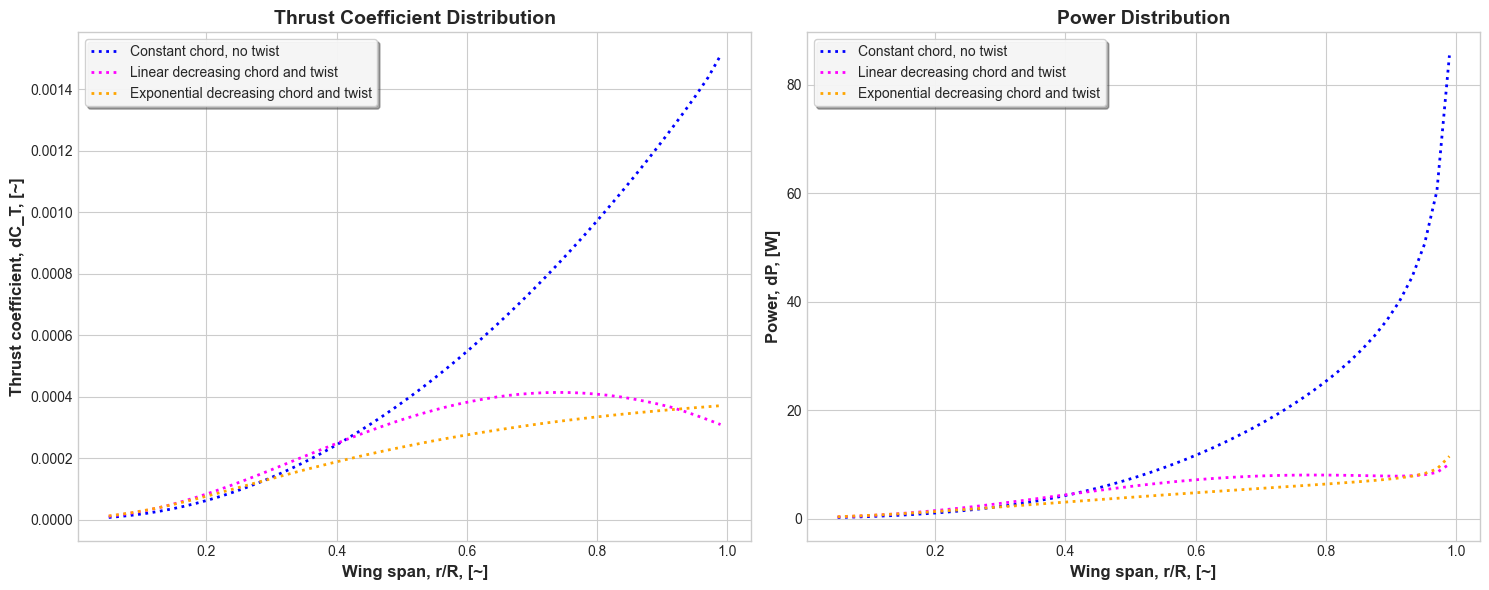

Total thrust for constant chord and no twist =  65.01218714883882 Total power for constant chord and no twist =  1483.4002278806352
Total thrust for linear decreasing chord and twist =  33.123803463415136 Total power for linear decreasing chord and twist =  526.9720715998272
Total thrust for exponential decreasing chord and twist =  27.260904893574732 Total power for exponential decreasing chord and twist =  417.3268801398329


In [185]:
# Plots the thrust coefficient distribution as well as the power distribution:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# Plot 1: Thrust coefficient
axs[0].plot(analyse(1)[0], analyse(1)[1], label='Constant chord, no twist', linestyle=':', linewidth=2, color='blue')
axs[0].plot(analyse(2)[0], analyse(2)[1], label='Linear decreasing chord and twist', linestyle=':', linewidth=2, color='fuchsia')
axs[0].plot(analyse(3)[0], analyse(3)[1], label='Exponential decreasing chord and twist', linestyle=':', linewidth=2, color='orange')
axs[0].set_xlabel('Wing span, r/R, [~]', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Thrust coefficient, dC_T, [~]', fontsize=12, fontweight='bold')
axs[0].set_title('Thrust Coefficient Distribution', fontweight='bold', fontsize=14)
axs[0].grid(True)
axs[0].legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.9, shadow=True)

# Plot 2: Power
axs[1].plot(analyse(1)[0], analyse(1)[2], label='Constant chord, no twist', linestyle=':', linewidth=2, color='blue')
axs[1].plot(analyse(2)[0], analyse(2)[2], label='Linear decreasing chord and twist', linestyle=':', linewidth=2, color='fuchsia')
axs[1].plot(analyse(3)[0], analyse(3)[2], label='Exponential decreasing chord and twist', linestyle=':', linewidth=2, color='orange')
axs[1].set_xlabel('Wing span, r/R, [~]', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Power, dP, [W]', fontsize=12, fontweight='bold')  
axs[1].set_title('Power Distribution', fontweight='bold', fontsize=14)
axs[1].grid(True)
axs[1].legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.9, shadow=True)

plt.tight_layout()
plt.show()

# Prints values for total thrust and total power for the 3 described airfoils:
print("Total thrust for constant chord and no twist = ", analyse(1)[3], "Total power for constant chord and no twist = ", analyse(1)[4])
print("Total thrust for linear decreasing chord and twist = ", analyse(2)[3], "Total power for linear decreasing chord and twist = ", analyse(2)[4])
print("Total thrust for exponential decreasing chord and twist = ", analyse(3)[3], "Total power for exponential decreasing chord and twist = ", analyse(3)[4])

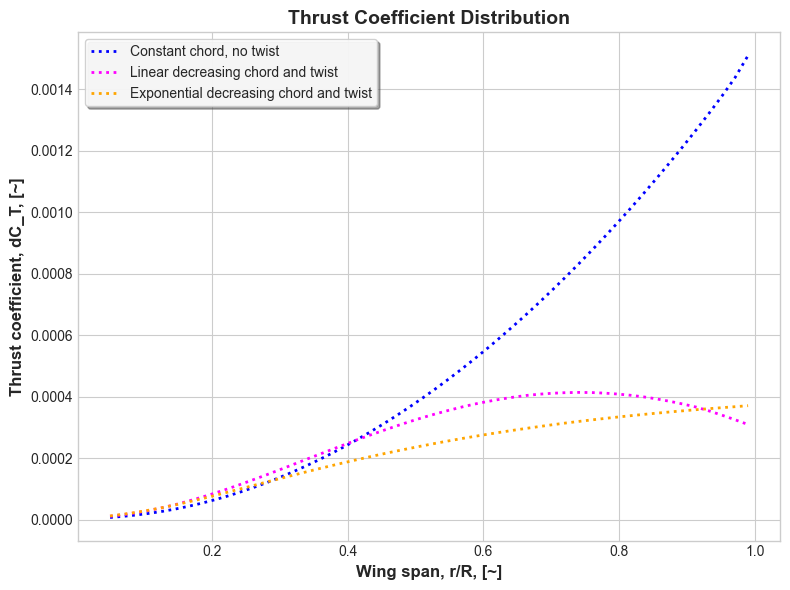

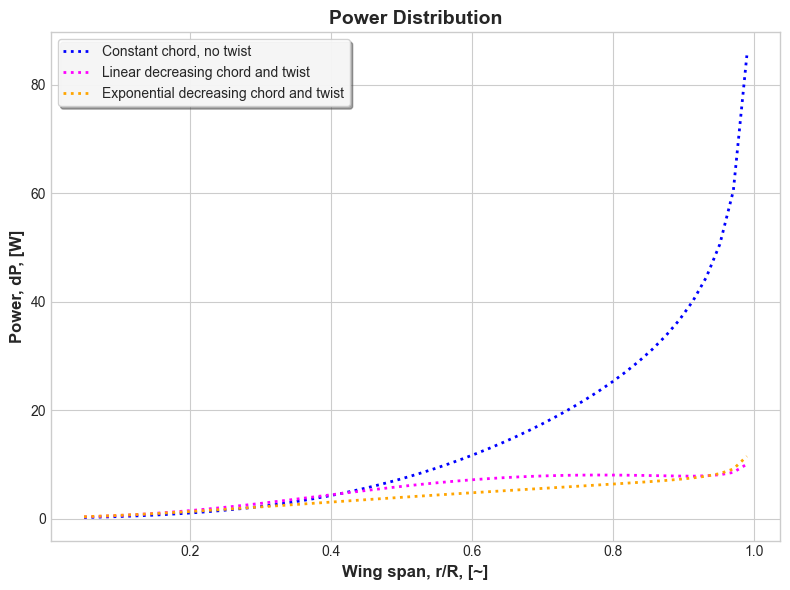

Total thrust for constant chord and no twist =  65.01218714883882 Total power for constant chord and no twist =  1483.4002278806352
Total thrust for linear decreasing chord and twist =  33.123803463415136 Total power for linear decreasing chord and twist =  526.9720715998272
Total thrust for exponential decreasing chord and twist =  27.260904893574732 Total power for exponential decreasing chord and twist =  417.3268801398329


In [186]:
# Plots the thrust coefficient distribution as well as the power distribution:

# Plot 1: Thrust coefficient
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(analyse(1)[0], analyse(1)[1], label='Constant chord, no twist', linestyle=':', linewidth=2, color='blue')
ax1.plot(analyse(2)[0], analyse(2)[1], label='Linear decreasing chord and twist', linestyle=':', linewidth=2, color='fuchsia')
ax1.plot(analyse(3)[0], analyse(3)[1], label='Exponential decreasing chord and twist', linestyle=':', linewidth=2, color='orange')
ax1.set_xlabel('Wing span, r/R, [~]', fontsize=12, fontweight='bold')
ax1.set_ylabel('Thrust coefficient, dC_T, [~]', fontsize=12, fontweight='bold')
ax1.set_title('Thrust Coefficient Distribution', fontweight='bold', fontsize=14)
ax1.grid(True)
ax1.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.9, shadow=True)
plt.tight_layout()
plt.show()

# Plot 2: Power
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(analyse(1)[0], analyse(1)[2], label='Constant chord, no twist', linestyle=':', linewidth=2, color='blue')
ax2.plot(analyse(2)[0], analyse(2)[2], label='Linear decreasing chord and twist', linestyle=':', linewidth=2, color='fuchsia')
ax2.plot(analyse(3)[0], analyse(3)[2], label='Exponential decreasing chord and twist', linestyle=':', linewidth=2, color='orange')
ax2.set_xlabel('Wing span, r/R, [~]', fontsize=12, fontweight='bold')
ax2.set_ylabel('Power, dP, [W]', fontsize=12, fontweight='bold')  
ax2.set_title('Power Distribution', fontweight='bold', fontsize=14)
ax2.grid(True)
ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.9, shadow=True)
plt.tight_layout()
plt.show()

# Prints values for total thrust and total power for the 3 described airfoils:
print("Total thrust for constant chord and no twist = ", analyse(1)[3], "Total power for constant chord and no twist = ", analyse(1)[4])
print("Total thrust for linear decreasing chord and twist = ", analyse(2)[3], "Total power for linear decreasing chord and twist = ", analyse(2)[4])
print("Total thrust for exponential decreasing chord and twist = ", analyse(3)[3], "Total power for exponential decreasing chord and twist = ", analyse(3)[4])
